Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<u>**ACTIVITY**</u> | <u>**Performing Face Recognition**</u>
**Name** | Castillo, Maria Antonette O.
**Section** | CPE32S8
**Date Performed**: | 02/20/2024
**Date Submitted**: | 02/20/2024
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [ ]:
image = r'C:\Users\maria\Downloads\captured_images'
read_images(image, sz=None)

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [3]:
import numpy as np
import os
import errno
import sys
import cv2

image = r'C:\Users\maria\Downloads\captured_images'

def face_rec():
  names = ['Mhiema', 'imthelaw'] # Put your names here for faces to recognize
  X, y = read_images(image,(200,200))
  y = np.asarray(y, dtype=np.int32)
  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)
  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r'C:\Users\maria\Downloads\haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        if 150 >= params[1]:
          label = names[params[0]]
        else:
          label = 'Unknown' 

        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()
   

Trials:

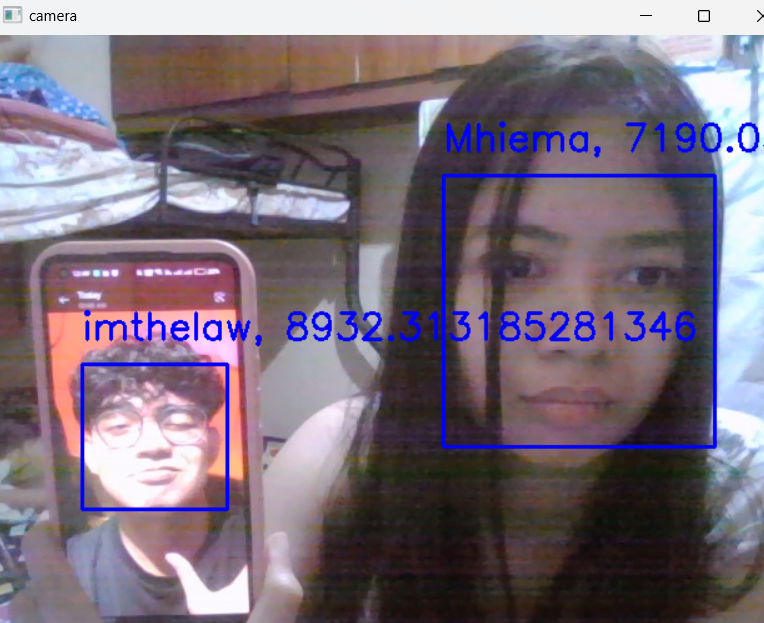

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

image = r'C:\Users\maria\Downloads\captured_images'

def face_rec():
  names = ['Canja','Barcelona','Castillo','Daiz','Dela Rosa'] # Put your names here for faces to recognize
  X, y = read_images(image,(200,200))
  y = np.asarray(y, dtype=np.int32)
  model = cv2.face.LBPHFaceRecognizer_create()
  model.train(X, y)
  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r'C:\Users\maria\Downloads\haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        if 150 >= params[1]:
          label = names[params[0]]
        else:
          label = 'Unknown' 

        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()
   

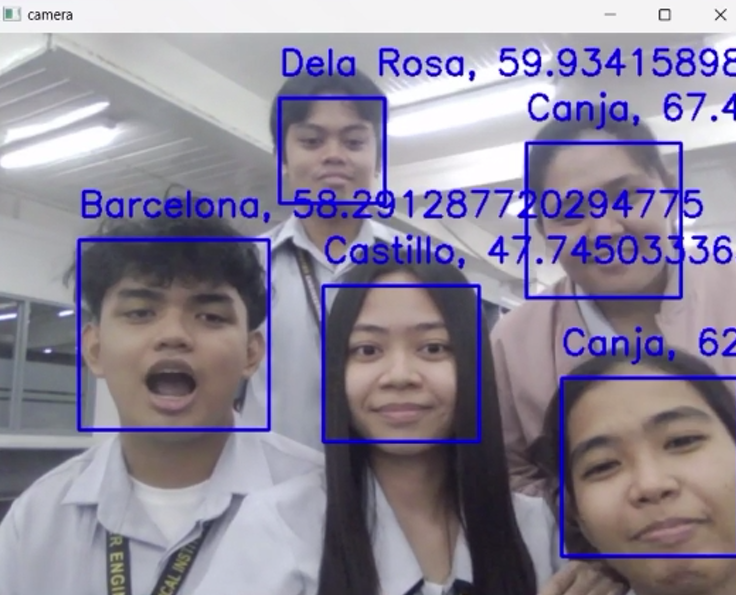

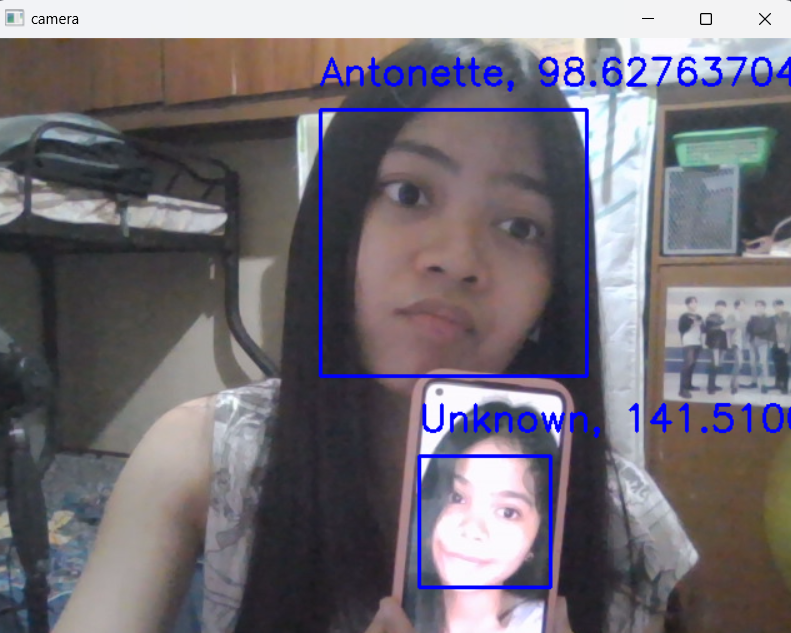

Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.

***The predict() method returns a two-element array consisting of the predicted label and its confidence score. The predicted label (params[0]) corresponds to the index of the names list. If the value falls within the valid range of indices for the names list, it signifies a recognized face; if not, it indicates an unknown face. The confidence score (params[1]) represents the model's certainty regarding the prediction. Lower confidence scores means closer resemblance, while higher scores imply a lower certainty in the prediction.***

## 5. Summary, Conclusions and Lessons Learned

***In this activity, I have explored face recognition using algorithms like Eigenface and Local Binary Pattern Histograms (LBPH). I trained the model with the use of our faces, and it successfully recognized the members and even the unkown faces. The predict() method is used to return a two-element array containing the predicted label and the associated confidence score for the recognized face. These values are important for identifying an individual and analayzing the certainty of the recognition.***

<hr/>

***Proprietary Clause.***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*